# Exercise 6: Visualization

Para este ejercicio se generó un grafo geometrico aleatorio con nodos distribuidos al azar en un plano 2D. Los nodos se colectan solo si estan a una distancia menor de un umbral definido por el usuario, luego, se identifica el nodo centroal (el más cercano al centro) y se obtiene la distancia más corta desde ese nodo hacia los demas. <br><br>

Finalmente, se dibuja el grafo coloreando los nodos en funcion de su distancia al nodo central usando un gradiente rojo como el ejemplo del profesor.



In [42]:
import Pkg 

#=
Pkg.activate("new_env")
Pkg.Registry.rm("General")
Pkg.Registry.add("General")
Pkg.activate(".")
=#


Pkg.add("Graphs")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("GraphPlot")
Pkg.add("Cairo")
Pkg.add("Compose")
 



import Pkg; Pkg.offline(true)


using Graphs, Plots, Random, Cairo, Compose


   Resolving package versions...
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`
   Resolving package versions...
   Installed Cairo ─ v1.1.1
    Updating `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  [159f3aea] + Cairo v1.1.1
    Updating `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`
  [159f3aea] + Cairo

### Generación del grafo:

Aquí se sigue el código compartido por el [profesor](https://docs.google.com/presentation/d/1tSNaUJc2NxEO3wWga_yCK4m61x9pJM2aHaPsn-OLc_s/edit#slide=id.g2d5ac4b0230_0_23) en **Python**, pero ttraduciendolo a Julia. <br><br>

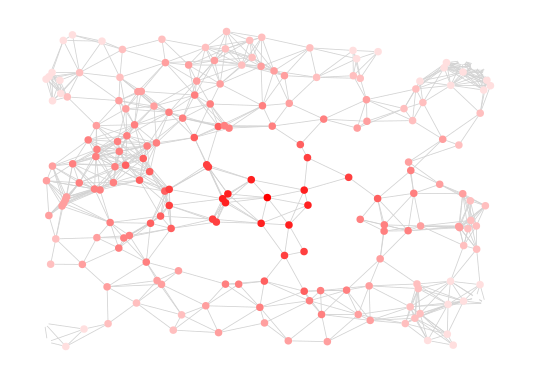

In [48]:


# Definimos como 200 el número de nodos 
num_nodos = 200  
# Definimos un umbral de tolerancia para añadir conexiones
umbral_distancia = 0.125  

# Definimos las posiciones de los nodos como una lista de duplas aleatorias
posiciones = [(rand(), rand()) for _ in 1:num_nodos]

# Creamos un grafo vacío
grafo = Graphs.SimpleGraph(num_nodos)

# Conectamos los nodos si la distancia entre ellos es menor al umbral
for i in 1:num_nodos
    for j in i+1:num_nodos
        # Ya que estamos en un espacio de dos dimenciones usamos la distancia euclidiana
        distancia = sqrt((posiciones[i][1] - posiciones[j][1])^2 + (posiciones[i][2] - posiciones[j][2])^2)
        if distancia < umbral_distancia
            Graphs.add_edge!(grafo, i, j)
        end
    end
end

# Encontramos el nodo más cercano al centro (0.5, 0.5)
# No se usa el centro como (0,0) ya que como definimos las 
# posiciones como (rand(), rand()) y estas generan valores 
# aleatorios de 0 a 1 entonces usamos la mitad (0.5) como centro
# en ambos ejes

centro = (0.5, 0.5)
distancias_al_centro = [sqrt((x - centro[1])^2 + (y - centro[2])^2) for (x, y) in posiciones]
nodo_central = argmin(distancias_al_centro)  # Nodo más cercano al centro

# Calcular las distancias más cortas desde el nodo central a todos los nodos con el algoritmo de Dijkstra
caminos_cortos = Graphs.dijkstra_shortest_paths(grafo, nodo_central)

# Obtenemos las distancias del objeto caminos_cortos
distancias_cortas = caminos_cortos.dists

# Normalizar las distancias para colores
max_dist = maximum(distancias_cortas)

#= Definimos el gradiente de colores como:

Rojo para aquellos cerca del centro, o bien en d = 0 tendremos (1.0,0.0,0.0)
Blanco para puntos cerca de los bordes, o bien d = max_dist tendremos (1.0,1.0,1.0)

Donde hacemos tender d a max_dist al gradiente de color RGB(1.0, d / max_dist, d / max_dist) 
=#
colores = [RGB(1.0, d / max_dist, d / max_dist) for d in distancias_cortas]


# Vizualizamos el  grafo con las distancias codificadas por color
locs_x = [pos[1] for pos in posiciones]
locs_y = [pos[2] for pos in posiciones]



p = gplot(
    grafo,
    locs_x, locs_y;
    nodesize=fill(0.01, num_nodos),
    nodefillc=colores,
    nodelabel=fill("", num_nodos)
)




In [53]:
# Ya que el grafo no es un "gráfico convencional" usamos la funcion 
# Compose.draw para generarla como una imagen PNG

draw(PNG("grafo.png", 800px, 800px), p)  # Guardar imagen PNG


   Resolving package versions...
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Project.toml`
  No Changes to `/Volumes/NO NAME/julia/src/Tarea_ejercicio_6/Manifest.toml`


### Adicional:

Ya que la naturaleza de este ejercicio solo se limita a la generación del grafo, no podemos concluir mucho, más que dado que hay muchas librerias en **Julia** con objetivos similares, es preciso conocerlas para poder llegar a resultados adecuados. <br><br>

Por ejemplo, al principio de este ejercicio usamos la biblioteca **LightGraphs**, que aunque similar a **Graphs** los inputs y outputs de sus funciones difiere, haciendo que no sea tan intuitivo (al menos para mi) su uso, por lo que al final, nos decantamos por **Graphs** por su tipo de uso más intuitivo.
